In [25]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization

from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
X_train = x_train.reshape(-1, 28*28)
X_test = x_test.reshape(-1, 28*28)

In [4]:
encoder = LabelEncoder()
encoder.fit(y_train)
Y_train = encoder.transform(y_train)
Y_train = np_utils.to_categorical(Y_train)

In [5]:
encoder.fit(y_test)
Y_test = encoder.transform(y_test)
Y_test = np_utils.to_categorical(Y_test)
Y_train[-1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=7777)

In [7]:
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

/Users/s0wnd/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [8]:
w_init_name = 'glorot_normal'  # glorot_normal : Xavier, he_normal : He
a_func_name = 'relu'
d_rate = 0.3

def M_classification():
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[-1], kernel_initializer=w_init_name, bias_initializer='zeros', activation=a_func_name))
    model.add(BatchNormalization())
    model.add(Dropout(d_rate))
    
    model.add(Dense(50, activation=a_func_name))
    model.add(BatchNormalization())
    model.add(Dropout(d_rate))
    
    model.add(Dense(50, activation=a_func_name))
    model.add(BatchNormalization())
    model.add(Dropout(d_rate))
    
    model.add(Dense(np.unique(y_train).size, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

In [9]:
Model = KerasClassifier(M_classification, batch_size=100)

In [18]:
validator = GridSearchCV(Model, param_grid= {'epochs':[30, 50]})
model_hist = validator.fit(X_val, Y_val)

Epoch 1/30
8000/8000 [==============================] - 1s - loss: 1.6578 - acc: 0.4469     
Epoch 2/30
8000/8000 [==============================] - 0s - loss: 0.8850 - acc: 0.7129     
Epoch 3/30
8000/8000 [==============================] - 0s - loss: 0.6392 - acc: 0.7986     
Epoch 4/30
8000/8000 [==============================] - 0s - loss: 0.5379 - acc: 0.8365     
Epoch 5/30
8000/8000 [==============================] - 0s - loss: 0.4738 - acc: 0.8597     
Epoch 6/30
8000/8000 [==============================] - 0s - loss: 0.4163 - acc: 0.8771     
Epoch 7/30
8000/8000 [==============================] - 0s - loss: 0.3863 - acc: 0.8835     
Epoch 8/30
8000/8000 [==============================] - 0s - loss: 0.3513 - acc: 0.8953     
Epoch 9/30
8000/8000 [==============================] - 0s - loss: 0.3295 - acc: 0.9033     
Epoch 10/30
8000/8000 [==============================] - 0s - loss: 0.3125 - acc: 0.9086     
Epoch 11/30
8000/8000 [==============================] - 0s - loss: 0

8000/8000 [==============================] - 0s - loss: 0.1663 - acc: 0.9494     
Epoch 27/30
8000/8000 [==============================] - 0s - loss: 0.1643 - acc: 0.9491     
Epoch 28/30
8000/8000 [==============================] - 0s - loss: 0.1604 - acc: 0.9497     
Epoch 29/30
8000/8000 [==============================] - 0s - loss: 0.1550 - acc: 0.9521     
Epoch 30/30
8000/8000 [==============================] - 1s - loss: 1.7478 - acc: 0.4209     
Epoch 2/50
8000/8000 [==============================] - 0s - loss: 0.9081 - acc: 0.7100     
Epoch 3/50
8000/8000 [==============================] - 0s - loss: 0.6924 - acc: 0.7772     
Epoch 4/50
8000/8000 [==============================] - 0s - loss: 0.5706 - acc: 0.8211     
Epoch 5/50
8000/8000 [==============================] - 0s - loss: 0.5019 - acc: 0.8499     
Epoch 6/50
8000/8000 [==============================] - 0s - loss: 0.4656 - acc: 0.8600     
Epoch 7/50
8000/8000 [==============================] - 0s - loss: 0.4221 - a

8000/8000 [==============================] - 0s - loss: 0.1539 - acc: 0.9531     
Epoch 33/50
8000/8000 [==============================] - 0s - loss: 0.1455 - acc: 0.9540     
Epoch 34/50
8000/8000 [==============================] - 0s - loss: 0.1350 - acc: 0.9583     
Epoch 35/50
8000/8000 [==============================] - 0s - loss: 0.1291 - acc: 0.9603     
Epoch 36/50
8000/8000 [==============================] - 0s - loss: 0.1288 - acc: 0.9605     
Epoch 37/50
8000/8000 [==============================] - 0s - loss: 0.1304 - acc: 0.9618     
Epoch 38/50
8000/8000 [==============================] - 0s - loss: 0.1289 - acc: 0.9608     
Epoch 39/50
8000/8000 [==============================] - 0s - loss: 0.1362 - acc: 0.9564     
Epoch 40/50
8000/8000 [==============================] - 0s - loss: 0.1234 - acc: 0.9591     
Epoch 41/50
8000/8000 [==============================] - 0s - loss: 0.1185 - acc: 0.9639     
Epoch 42/50
8000/8000 [==============================] - 0s - loss: 0.12

12000/12000 [==============================] - 1s - loss: 0.1967 - acc: 0.9417     
Epoch 19/50
12000/12000 [==============================] - 1s - loss: 0.1867 - acc: 0.9428     
Epoch 20/50
12000/12000 [==============================] - 1s - loss: 0.1784 - acc: 0.9448     
Epoch 21/50
12000/12000 [==============================] - 1s - loss: 0.1829 - acc: 0.9443     
Epoch 22/50
12000/12000 [==============================] - 1s - loss: 0.1806 - acc: 0.9467     
Epoch 23/50
12000/12000 [==============================] - 1s - loss: 0.1677 - acc: 0.9504     
Epoch 24/50
12000/12000 [==============================] - 1s - loss: 0.1676 - acc: 0.9495     
Epoch 25/50
12000/12000 [==============================] - 1s - loss: 0.1599 - acc: 0.9521     
Epoch 26/50
12000/12000 [==============================] - 1s - loss: 0.1459 - acc: 0.9570     
Epoch 27/50
12000/12000 [==============================] - 1s - loss: 0.1583 - acc: 0.9530     
Epoch 28/50
12000/12000 [===========================

In [19]:
best_model = validator.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(X_train, Y_train)

47648/48000 [============================>.] - ETA: 0s

In [20]:
xavier_hist = best_model.fit(X_train, Y_train)

Epoch 1/10
48000/48000 [==============================] - 14s - loss: 0.3064 - acc: 0.9137    
Epoch 2/10
48000/48000 [==============================] - 14s - loss: 0.2586 - acc: 0.9270    
Epoch 3/10
48000/48000 [==============================] - 14s - loss: 0.2445 - acc: 0.9308    
Epoch 4/10
48000/48000 [==============================] - 14s - loss: 0.2320 - acc: 0.9331    
Epoch 5/10
48000/48000 [==============================] - 14s - loss: 0.2226 - acc: 0.9371    
Epoch 6/10
48000/48000 [==============================] - 14s - loss: 0.2223 - acc: 0.9366    
Epoch 7/10
48000/48000 [==============================] - 14s - loss: 0.2122 - acc: 0.9386    
Epoch 8/10
48000/48000 [==============================] - 14s - loss: 0.2037 - acc: 0.9426    
Epoch 9/10
48000/48000 [==============================] - 15s - loss: 0.1995 - acc: 0.9429    
Epoch 10/10
48000/48000 [==============================] - 14s - loss: 0.1920 - acc: 0.9443    


In [21]:
Y_predict = best_model.predict(X_test)
Y_predict

array([[  3.38249847e-05,   2.51805013e-05,   8.43207454e-05, ...,
          9.99380946e-01,   1.63713157e-05,   1.48970095e-04],
       [  7.07130384e-05,   6.62032631e-04,   9.96821165e-01, ...,
          1.73915992e-04,   5.83072833e-04,   1.57260693e-05],
       [  3.28999795e-06,   9.99782264e-01,   1.35250966e-05, ...,
          4.93305160e-05,   1.00640289e-04,   5.59110276e-06],
       ..., 
       [  7.09620849e-07,   1.23404789e-05,   6.41026327e-06, ...,
          1.43513616e-05,   9.02683405e-06,   1.30309185e-04],
       [  7.79621629e-08,   3.21746757e-06,   1.85946362e-06, ...,
          2.47321191e-06,   6.01682186e-05,   2.94320012e-06],
       [  2.05816377e-05,   5.84464715e-06,   1.75999903e-05, ...,
          8.60180194e-07,   3.28468559e-05,   2.14011789e-06]], dtype=float32)

In [15]:
Y_test = np.argmax(Y_test, axis=1)
Y_predict = np.argmax(Y_predict, axis=1)
metrics.accuracy_score(Y_test, Y_predict)

0.97289999999999999

In [16]:
print(metrics.classification_report(Y_test, Y_predict))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.97      0.97      1032
          3       0.96      0.98      0.97      1010
          4       0.98      0.96      0.97       982
          5       0.98      0.97      0.97       892
          6       0.97      0.98      0.98       958
          7       0.97      0.97      0.97      1028
          8       0.97      0.97      0.97       974
          9       0.97      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000



In [17]:
metrics.confusion_matrix(Y_test, Y_predict)

array([[ 972,    0,    1,    0,    0,    1,    3,    1,    2,    0],
       [   0, 1121,    2,    3,    0,    0,    3,    1,    5,    0],
       [   4,    1,  999,    5,    4,    0,    2,    8,    8,    1],
       [   0,    0,    3,  988,    0,    8,    0,    8,    3,    0],
       [   1,    0,    5,    0,  939,    0,    8,    3,    2,   24],
       [   3,    0,    1,    9,    1,  862,    7,    2,    2,    5],
       [   6,    3,    0,    0,    2,    4,  940,    0,    3,    0],
       [   2,    7,   13,    2,    2,    0,    0,  998,    1,    3],
       [   7,    1,    2,    7,    3,    4,    3,    4,  941,    2],
       [   3,    4,    0,   11,   10,    4,    1,    6,    1,  969]])

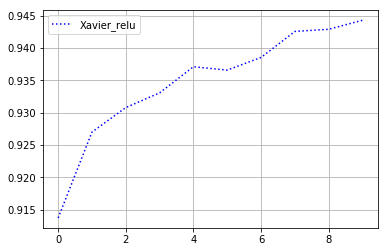

In [29]:
plt.plot(xavier_hist.history['acc'], 'b:', label="Xavier_relu")
plt.grid()
plt.legend()
plt.show()

In [28]:
xavier_hist.history['acc']

[0.91374999999999995,
 0.92702083333333329,
 0.93081250000000004,
 0.93308333333333338,
 0.93712499999999999,
 0.93660416666666668,
 0.93856249999999997,
 0.94258333333333333,
 0.94291666666666663,
 0.9443125]